# Welcome
### Seminar in data sceince, project notebook
* Tel Aviv university, department of economics
* Authors: Elad Golan & Dov Tuch
* Fraud Detection in car insurance  

# **Part 0 - Load packages and dataset**

### 0.a - Packages 

In [1]:
#imort packages
import numpy as np # linear algebra
import pandas as pd # Data frames
import seaborn as sns # plots 
import matplotlib.pyplot as plt #plots
import sklearn # Data science package
from sklearn.impute import SimpleImputer # for replace NA with avarge
from sklearn.model_selection import train_test_split  # for spliting the data
from sklearn.ensemble import RandomForestClassifier # RF classifier
from sklearn.tree import plot_tree 
from sklearn.inspection import permutation_importance  #feature importance
from sklearn.pipeline import make_pipeline 
from sklearn.svm import SVC # SVM classifier
from sklearn.feature_selection import SelectKBest, chi2,mutual_info_classif #feature selection
from sklearn.preprocessing import StandardScaler # normlize features
from sklearn.naive_bayes import BernoulliNB , ComplementNB, CategoricalNB #NB classifiers 
# for evaluating preformance
from sklearn import metrics 
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score, accuracy_score, confusion_matrix, ConfusionMatrixDisplay, f1_score,fbeta_score, precision_recall_curve,auc
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
##
from collections import Counter
import researchpy as rp #for crosstab
import scipy.stats as stats # chi^2 test
from scipy.stats import pearsonr #correlation
import random #  for comuting random seed
 #preprocessing
from category_encoders.ordinal import OrdinalEncoder
from category_encoders.binary import BinaryEncoder
from category_encoders.one_hot import OneHotEncoder
##
import imblearn
from imblearn.over_sampling import SMOTE #oversampling
from imblearn.metrics import geometric_mean_score #metric
from imblearn.under_sampling import NearMiss #undersampling


### 0.b - Load Vechicle Insures Dataset 

In [2]:
url = "https://raw.githubusercontent.com/Eladgo10/DS-Seminar-project-/main/fraud_oracle.csv" #github link
dataset = pd.read_csv(url)
dataset

,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,...,AgeOfVehicle,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,Year,BasePolicy
0,Dec,5,Wednesday,Honda,Urban,Tuesday,Jan,1,Female,Single,...,3 years,26 to 30,No,No,External,none,1 year,3 to 4,1994,Liability
1,Jan,3,Wednesday,Honda,Urban,Monday,Jan,4,Male,Single,...,6 years,31 to 35,Yes,No,External,none,no change,1 vehicle,1994,Collision
2,Oct,5,Friday,Honda,Urban,Thursday,Nov,2,Male,Married,...,7 years,41 to 50,No,No,External,none,no change,1 vehicle,1994,Collision
3,Jun,2,Saturday,Toyota,Rural,Friday,Jul,1,Male,Married,...,more than 7,51 to 65,Yes,No,External,more than 5,no change,1 vehicle,1994,Liability
4,Jan,5,Monday,Honda,Urban,Tuesday,Feb,2,Female,Single,...,5 years,31 to 35,No,No,External,none,no change,1 vehicle,1994,Collision
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15415,Nov,4,Friday,Toyota,Urban,Tuesday,Nov,5,Male,Married,...,6 years,31 to 35,No,No,External,none,no change,1 vehicle,1996,Collision
15416,Nov,5,Thursday,Pontiac,Urban,Friday,Dec,1,Male,Married,...,6 years,31 to 35,No,No,External,more than 5,no change,3 to 4,1996,Liability
15417,Nov,5,Thursday,Toyota,Rural,Friday,Dec,1,Male,Single,...,5 years,26 to 30,No,No,External,1 to 2,no change,1 vehicle,1996,Collision
15418,Dec,1,Monday,Toyota,Urban,Thursday,Dec,2,Female,Married,...,2 years,31 to 35,No,No,External,more than 5,no change,1 vehicle,1996,All Perils


In [ ]:
dataset.columns

# **Part 1 - Desprective Statistics**

### 1.a Describe numeric variables

In [4]:
dataset.describe()


,WeekOfMonth,WeekOfMonthClaimed,Age,FraudFound_P,PolicyNumber,RepNumber,Deductible,DriverRating,Year
count,15420.000000,15420.000000,15420.000000,15420.000000,15420.000000,15420.000000,15420.000000,15420.000000,15420.000000
mean,2.788586,2.693969,39.855707,0.059857,7710.500000,8.483268,407.704280,2.487808,1994.866472
std,1.287585,1.259115,13.492377,0.237230,4451.514911,4.599948,43.950998,1.119453,0.803313
min,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,300.000000,1.000000,1994.000000
25%,2.000000,2.000000,31.000000,0.000000,3855.750000,5.000000,400.000000,1.000000,1994.000000
50%,3.000000,3.000000,38.000000,0.000000,7710.500000,8.000000,400.000000,2.000000,1995.000000
75%,4.000000,4.000000,48.000000,0.000000,11565.250000,12.000000,400.000000,3.000000,1996.000000
max,5.000000,5.000000,80.000000,1.000000,15420.000000,16.000000,700.000000,4.000000,1996.000000


### 1.b Describe qualtive features

In [5]:
dataset.describe(include=['object'])

,Month,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,Sex,MaritalStatus,Fault,PolicyType,...,PastNumberOfClaims,AgeOfVehicle,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,BasePolicy
count,15420,15420,15420,15420,15420,15420,15420,15420,15420,15420,...,15420,15420,15420,15420,15420,15420,15420,15420,15420,15420
unique,12,7,19,2,8,13,2,4,2,9,...,4,8,9,2,2,2,4,5,5,3
top,Jan,Monday,Pontiac,Urban,Monday,Jan,Male,Married,Policy Holder,Sedan - Collision,...,2 to 4,7 years,31 to 35,No,No,External,none,no change,1 vehicle,Collision
freq,1411,2616,3837,13822,3757,1446,13000,10625,11230,5584,...,5485,5807,5593,14992,15333,15179,7047,14324,14316,5962


### 1.c intresting variablas distrabution - bar plots, chi^2 test, common distrabution

In [6]:
print(dataset['FraudFound_P'].value_counts(),'\n') # 923 frauds and 14497 not fraud - outcome
print(dataset['AgeOfPolicyHolder'].value_counts(),'\n')
print(dataset['WitnessPresent'].value_counts(), '\n')
print(dataset['PoliceReportFiled'].value_counts())


0    14497
1      923
Name: FraudFound_P, dtype: int64 

31 to 35    5593
36 to 40    4043
41 to 50    2828
51 to 65    1392
26 to 30     613
over 65      508
16 to 17     320
21 to 25     108
18 to 20      15
Name: AgeOfPolicyHolder, dtype: int64 

No     15333
Yes       87
Name: WitnessPresent, dtype: int64 

No     14992
Yes      428
Name: PoliceReportFiled, dtype: int64


#### bar plots

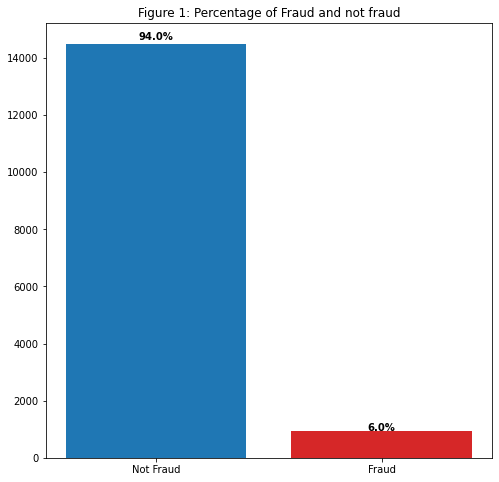

In [7]:
# creating data for the plot
data_FraudFound_P = pd.DataFrame({'category':['Not Fraud', 'Fraud'],
                     'counts': dataset['FraudFound_P'].value_counts().values,
                     'percentage': [round(sum(dataset.FraudFound_P == 0)/len(dataset), 3)*100 ,
                                    round(sum(dataset.FraudFound_P == 1)/len(dataset), 3)*100]
                    })
 

plt.figure(figsize=(8,8))
colors_list = ['tab:blue', 'tab:red']
graph = plt.bar(data_FraudFound_P.category,data_FraudFound_P.counts, color = colors_list)
plt.title("Figure 1: Percentage of Fraud and not fraud")

i = 0
for p in graph:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()
    plt.text(x+width/2,
             y+height*1.01,
             str(data_FraudFound_P.percentage[i])+'%',
             ha='center',
             weight='bold')
    i+=1
plt.show()

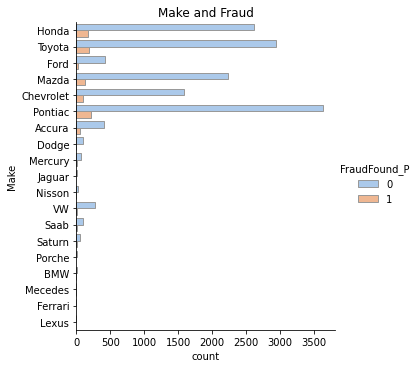

In [9]:
sns.catplot(y="Make", hue="FraudFound_P", kind="count",
            palette="pastel", edgecolor=".6",
            data=dataset).set(title = "Make and Fraud")
plt.show()


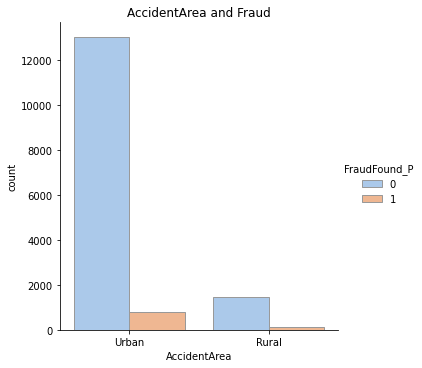

In [10]:
sns.catplot(x="AccidentArea", hue="FraudFound_P", kind="count",
            palette="pastel", edgecolor=".6",
            data=dataset).set(title = "AccidentArea and Fraud")
plt.show()


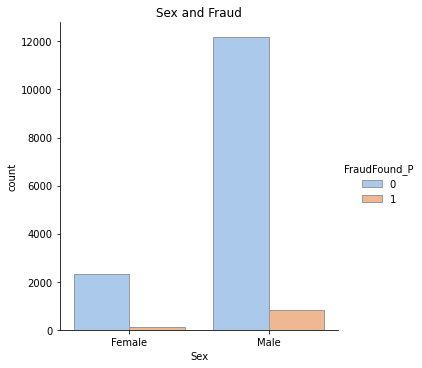

In [11]:
sns.catplot(x="Sex", hue="FraudFound_P", kind="count",
            palette="pastel", edgecolor=".6",
            data=dataset).set(title = "Sex and Fraud")
plt.show()


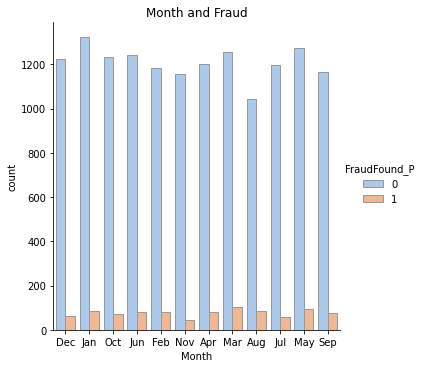

In [12]:
sns.catplot(x="Month", hue="FraudFound_P", kind="count",
            palette="pastel", edgecolor=".6",
            data=dataset).set(title = "Month and Fraud")
plt.show()


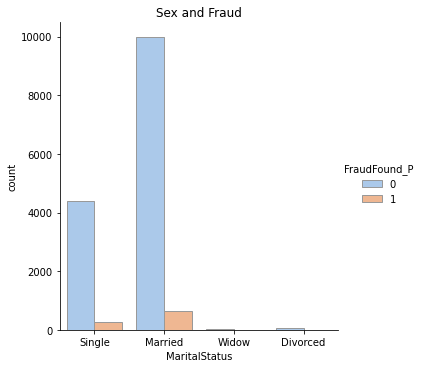

In [13]:
sns.catplot(x="MaritalStatus", hue="FraudFound_P", kind="count",
            palette="pastel", edgecolor=".6",
            data=dataset).set(title = "Sex and Fraud")
plt.show()


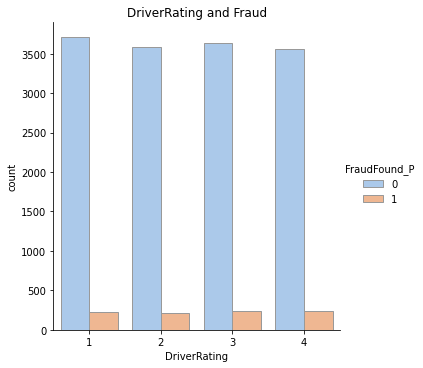

In [14]:
sns.catplot(x="DriverRating", hue="FraudFound_P", kind="count",
            palette="pastel", edgecolor=".6",
            data=dataset).set(title = "DriverRating and Fraud")
plt.show()


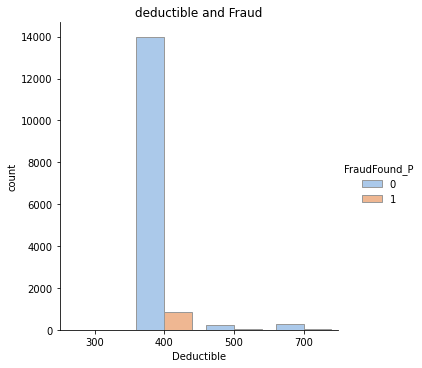

In [15]:
sns.catplot(x="Deductible", hue="FraudFound_P", kind="count",
            palette="pastel", edgecolor=".6",
            data=dataset).set(title = "deductible and Fraud")
plt.show()

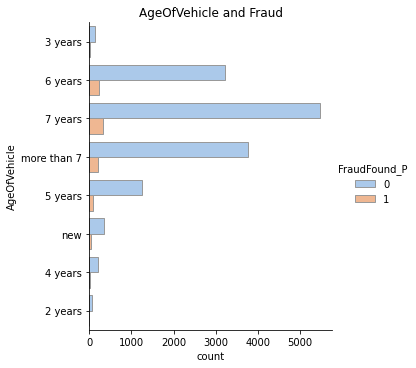

In [16]:
sns.catplot(y="AgeOfVehicle", hue="FraudFound_P", kind="count",
            palette="pastel", edgecolor=".6",
            data=dataset).set(title = "AgeOfVehicle and Fraud")
plt.show()

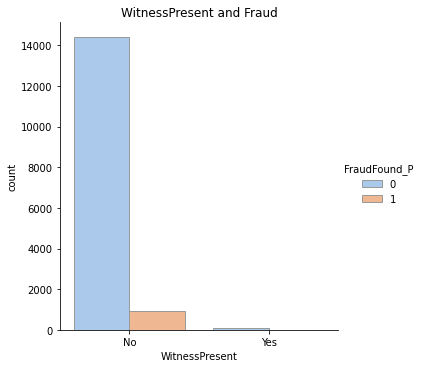

In [17]:
sns.catplot(x="WitnessPresent", hue="FraudFound_P", kind="count",
            palette="pastel", edgecolor=".6",
            data=dataset).set(title = "WitnessPresent and Fraud")
plt.show()

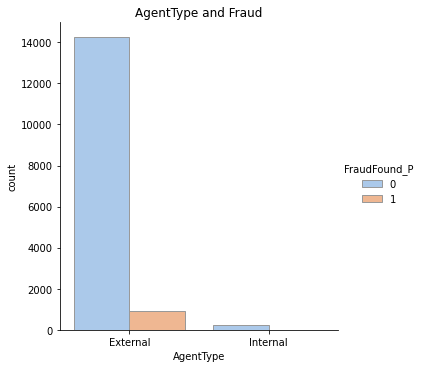

In [18]:
sns.catplot(x="AgentType", hue="FraudFound_P", kind="count",
            palette="pastel", edgecolor=".6",
            data=dataset).set(title = "AgentType and Fraud")
plt.show()

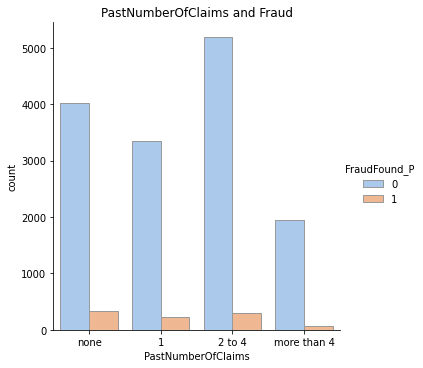

In [19]:
sns.catplot(x="PastNumberOfClaims", hue="FraudFound_P", kind="count",
            palette="pastel", edgecolor=".6",
            data=dataset).set(title = "PastNumberOfClaims and Fraud")
plt.show()

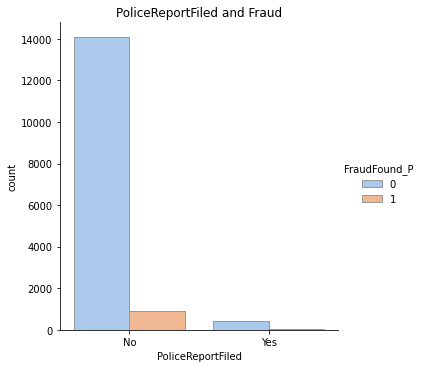

In [20]:
sns.catplot(x="PoliceReportFiled", hue="FraudFound_P", kind="count",
            palette="pastel", edgecolor=".6",
            data=dataset).set(title = "PoliceReportFiled and Fraud")
plt.show()

In [21]:
dataset.columns[~dataset.columns.isin(["Age", 'Month'])]

Index(['WeekOfMonth', 'DayOfWeek', 'Make', 'AccidentArea', 'DayOfWeekClaimed',
       'MonthClaimed', 'WeekOfMonthClaimed', 'Sex', 'MaritalStatus', 'Fault',
       'PolicyType', 'VehicleCategory', 'VehiclePrice', 'FraudFound_P',
       'PolicyNumber', 'RepNumber', 'Deductible', 'DriverRating',
       'Days_Policy_Accident', 'Days_Policy_Claim', 'PastNumberOfClaims',
       'AgeOfVehicle', 'AgeOfPolicyHolder', 'PoliceReportFiled',
       'WitnessPresent', 'AgentType', 'NumberOfSuppliments',
       'AddressChange_Claim', 'NumberOfCars', 'Year', 'BasePolicy'],
      dtype='object')

#### χ^2 test

In [ ]:
col_names = dataset.columns[~dataset.columns.isin(['Age', 'FraudFound_P'])]
for i in dataset.columns[~dataset.columns.isin(['Age', 'FraudFound_P'])]:
    col_names = col_names[col_names != i]
    for j in col_names:
        crosstab, test_results, expected = rp.crosstab(dataset[i], dataset[j],
                                               test= "chi-square",
                                               expected_freqs= True,
                                               prop= "cell")
        if test_results['results'][1] < 0.05:
            print(i + ' ' + j + ':')
            print(test_results)
            print('\n')
    print('****** new ******')
    

In [ ]:
for i in dataset.columns[~dataset.columns.isin(['Age', 'FraudFound_P'])]:
    crosstab, test_results, expected = rp.crosstab(dataset[i], dataset['FraudFound_P'],
                                               test= "chi-square",
                                               expected_freqs= True,
                                               prop= "cell")
    if test_results['results'][1] < 0.05:
        print(i + ':')
        print(test_results)
        print('\n')

    

In [ ]:
for i in dataset.columns[~dataset.columns.isin(['Age', 'FraudFound_P'])]:
    crosstab, test_results, expected = rp.crosstab(dataset[i], dataset['FraudFound_P'],
                                               test= "chi-square",
                                               expected_freqs= True,
                                               prop= "cell")
    if test_results['results'][1] > 0.05:
        print(i + ':')
        print(test_results)
        print('\n')


#### common distrabution

In [ ]:
pd.crosstab(dataset.Sex, dataset.FraudFound_P)


In [ ]:
pd.crosstab(dataset.Sex, dataset.FraudFound_P, normalize = 'columns')

In [ ]:
pd.crosstab(dataset.AccidentArea, dataset.FraudFound_P)

In [ ]:
pd.crosstab(dataset.AccidentArea, dataset.FraudFound_P, normalize = 'columns')

In [ ]:
pd.crosstab(dataset.VehicleCategory, dataset.FraudFound_P)

In [ ]:
pd.crosstab(dataset.VehicleCategory, dataset.FraudFound_P, normalize = 'columns')

In [ ]:
pd.crosstab(dataset.VehicleCategory, dataset.FraudFound_P, normalize = 'columns')

In [ ]:
for i in dataset.columns[~dataset.columns.isin(['Age', 'FraudFound_P'])]:
    print(pd.crosstab(dataset[i], dataset.FraudFound_P))
    print(pd.crosstab(dataset[i], dataset.FraudFound_P, normalize = 'columns'))
   

# **Part 2 - Data preproccesing** 

### 2.a drop irrelevant colmuns


 Function for dropping Irrelevant_colmuns - PolicyType, PolicyNumber


In [4]:
def Irrelevant_col(df , drop):
    df.drop(drop, axis=1, inplace=True)


#drop in my data set    
drop = ["PolicyType","PolicyNumber"] 
dataset_new = dataset
Irrelevant_col(dataset_new, drop)

dataset_new

,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,...,AgeOfVehicle,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,Year,BasePolicy
0,Dec,5,Wednesday,Honda,Urban,Tuesday,Jan,1,Female,Single,...,3 years,26 to 30,No,No,External,none,1 year,3 to 4,1994,Liability
1,Jan,3,Wednesday,Honda,Urban,Monday,Jan,4,Male,Single,...,6 years,31 to 35,Yes,No,External,none,no change,1 vehicle,1994,Collision
2,Oct,5,Friday,Honda,Urban,Thursday,Nov,2,Male,Married,...,7 years,41 to 50,No,No,External,none,no change,1 vehicle,1994,Collision
3,Jun,2,Saturday,Toyota,Rural,Friday,Jul,1,Male,Married,...,more than 7,51 to 65,Yes,No,External,more than 5,no change,1 vehicle,1994,Liability
4,Jan,5,Monday,Honda,Urban,Tuesday,Feb,2,Female,Single,...,5 years,31 to 35,No,No,External,none,no change,1 vehicle,1994,Collision
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15415,Nov,4,Friday,Toyota,Urban,Tuesday,Nov,5,Male,Married,...,6 years,31 to 35,No,No,External,none,no change,1 vehicle,1996,Collision
15416,Nov,5,Thursday,Pontiac,Urban,Friday,Dec,1,Male,Married,...,6 years,31 to 35,No,No,External,more than 5,no change,3 to 4,1996,Liability
15417,Nov,5,Thursday,Toyota,Rural,Friday,Dec,1,Male,Single,...,5 years,26 to 30,No,No,External,1 to 2,no change,1 vehicle,1996,Collision
15418,Dec,1,Monday,Toyota,Urban,Thursday,Dec,2,Female,Married,...,2 years,31 to 35,No,No,External,more than 5,no change,1 vehicle,1996,All Perils


#### 2.b dealing non available values
 

changing the zero values to nan values in columns: Age, DayOfWeekClaimed, weekclaimed

In [3]:
#Age
print(sum(dataset['Age']  == 0))
dataset.loc[dataset['Age'] == 0, 'Age'] = np.nan

#DayOfWeekClaimed
print(dataset['DayOfWeekClaimed'].unique())
dataset[dataset['DayOfWeekClaimed'] == '0'] # obs 1516 has a 
dataset.loc[dataset['DayOfWeekClaimed'] == 0, 'DayOfWeekClaimed'] = np.nan

#MonthClaimed
print(sum(dataset['MonthClaimed']  == '0'))
dataset.loc[dataset['MonthClaimed'] == '0', 'DayOfWeekClaimed'] = np.nan

320
['Tuesday' 'Monday' 'Thursday' 'Friday' 'Wednesday' 'Saturday' 'Sunday'
 '0']
1


Null values of age, day of week - replacing with mean

In [5]:
# removing rows
dataset_new_rem = dataset_new.dropna(subset = ['Age'])
dataset_new_rem = dataset_new_rem.dropna(subset =['MonthClaimed' ,'DayOfWeekClaimed'])
#print(dataset_new_rem.isnull().sum())

# avereging
imputer = SimpleImputer(missing_values=np.NaN, strategy='mean') 
# We instantiated a SimpleImputer object looking for missing values that are represented
#by np.NaN and asking Scikit-Learn to use the 'mean' as its strategy. 
#This means that any np.NaN values will be imputed by the columns mean.

dataset_new_avg = dataset_new
imputer=imputer.fit(dataset_new_avg[['Age']])
dataset_new_avg[['Age']]=imputer.transform(dataset_new_avg[['Age']])
dataset_new_avg = dataset_new_avg.dropna(subset =['MonthClaimed' ,'DayOfWeekClaimed'])
#print(dataset_new_avg.isnull().sum())

### 2.c Dealing with categorials features

In [6]:
dataset_new.dtypes # can we see most of the variabales are categorial

Month                    object
WeekOfMonth               int64
DayOfWeek                object
Make                     object
AccidentArea             object
DayOfWeekClaimed         object
MonthClaimed             object
WeekOfMonthClaimed        int64
Sex                      object
MaritalStatus            object
Age                     float64
Fault                    object
VehicleCategory          object
VehiclePrice             object
FraudFound_P              int64
RepNumber                 int64
Deductible                int64
DriverRating              int64
Days_Policy_Accident     object
Days_Policy_Claim        object
PastNumberOfClaims       object
AgeOfVehicle             object
AgeOfPolicyHolder        object
PoliceReportFiled        object
WitnessPresent           object
AgentType                object
NumberOfSuppliments      object
AddressChange_Claim      object
NumberOfCars             object
Year                      int64
BasePolicy               object
dtype: o

In [7]:
#make a copy of the data for making changes
y =  dataset_new.FraudFound_P.copy()
X = dataset_new.drop('FraudFound_P', axis = 1, inplace=False ).copy()

Binary variables zero one coding:

In [8]:
cols = ['AccidentArea', 'Sex', 'Fault', 'PoliceReportFiled', 'WitnessPresent', 'AgentType']
y_val = ['Urban','Female','Policy Holder', 'Yes', 'Yes','External']
x_val = ['Rural', 'Male', 'Third Party', 'No', 'No', 'Internal']

for i in range(len(cols)):
    X_idx1 = X[cols[i]]==y_val[i]
    X_idx2 = X[cols[i]]==x_val[i]

    X.loc[list(X_idx1),cols[i]]=1
    X.loc[list(X_idx2),cols[i]]=0

for i in range(len(cols)):
    X[cols[i]] = X[cols[i]].astype('int')
    
X.dtypes

Month                    object
WeekOfMonth               int64
DayOfWeek                object
Make                     object
AccidentArea              int32
DayOfWeekClaimed         object
MonthClaimed             object
WeekOfMonthClaimed        int64
Sex                       int32
MaritalStatus            object
Age                     float64
Fault                     int32
VehicleCategory          object
VehiclePrice             object
RepNumber                 int64
Deductible                int64
DriverRating              int64
Days_Policy_Accident     object
Days_Policy_Claim        object
PastNumberOfClaims       object
AgeOfVehicle             object
AgeOfPolicyHolder        object
PoliceReportFiled         int32
WitnessPresent            int32
AgentType                 int32
NumberOfSuppliments      object
AddressChange_Claim      object
NumberOfCars             object
Year                      int64
BasePolicy               object
dtype: object

Ordianal categorial featurs:

In [9]:
col_ordering = [{'col':'Month','mapping':{'Jan':1,'Feb':2,'Mar':3,'Apr':4,'May':5,'Jun':6,'Jul':7,'Aug':8,'Sep':9,'Oct':10,'Nov':11,'Dec':12}},
    {'col':'DayOfWeek','mapping':{'Monday':1,'Tuesday':2,'Wednesday':3,'Thursday':4,'Friday':5,'Saturday':6,'Sunday':7}},
    {'col':'DayOfWeekClaimed','mapping':{'Monday':1,'Tuesday':2,'Wednesday':3,'Thursday':4,'Friday':5,'Saturday':6,'Sunday':7}},
    {'col':'MonthClaimed','mapping':{'Jan':1,'Feb':2,'Mar':3,'Apr':4,'May':5,'Jun':6,'Jul':7,'Aug':8,'Sep':9,'Oct':10,'Nov':11,'Dec':12}},
    {'col':'PastNumberOfClaims','mapping':{'none':0 ,'1':1,'2 to 4':2,'more than 4':5 }},
    {'col':'NumberOfSuppliments','mapping':{'none':0,'1 to 2':1,'3 to 5':3,'more than 5':6}}, 
    {'col':'VehiclePrice','mapping':{'more than 69000':69001,'20000 to 29000':24500,'30000 to 39000':34500,'less than 20000':19999,
                                     '40000 to 59000':49500,'60000 to 69000':64500}},
    {'col':'AgeOfVehicle','mapping':{'3 years':3,'6 years':6,'7 years':7,'more than 7':8,'5 years':5,'new':0,'4 years':4,'2 years':2}},
]
ord_encoder = OrdinalEncoder(mapping = col_ordering, return_df=True)
X2 = ord_encoder.fit_transform(X)
X2.loc[X2["DayOfWeekClaimed"] == -1.0,"DayOfWeekClaimed"] = 0
X2.loc[X2["MonthClaimed"] == -1.0,"MonthClaimed"] = 0

ordianal categorial featurs - taking the avg for each category 


In [10]:
col_map = [{'Days_Policy_Accident':{'more than 30': 31,'15 to 30': 22.5,'none': 0,'1 to 7': 4,'8 to 15': 11.5}},
    {'Days_Policy_Claim':{'more than 30': 31,'15 to 30': 22.5,'8 to 15': 11.5,'none': 0}},
    {'AgeOfPolicyHolder':{'26 to 30':28,'31 to 35':33,'41 to 50':45.5,'51 to 65':58,'21 to 25':23,'36 to 40':38,'16 to 17':16.5,
                                          'over 65':66,'18 to 20':19}},
    {'AddressChange_Claim':{'1 year':1,'no change':0,'4 to 8 years':6,'2 to 3 years':2.5,'under 6 months':0.5}},
    {'NumberOfCars':{'3 to 4':3.5,'1 vehicle':1,'2 vehicles':2,'5 to 8':6.5,'more than 8':9}},
]

X3 = X2.copy()
for i in range(len(col_map)):
    X3.replace(col_map[i], inplace=True)

X3.dtypes

Month                     int32
WeekOfMonth               int64
DayOfWeek                 int32
Make                     object
AccidentArea              int32
DayOfWeekClaimed        float64
MonthClaimed            float64
WeekOfMonthClaimed        int64
Sex                       int32
MaritalStatus            object
Age                     float64
Fault                     int32
VehicleCategory          object
VehiclePrice              int32
RepNumber                 int64
Deductible                int64
DriverRating              int64
Days_Policy_Accident    float64
Days_Policy_Claim       float64
PastNumberOfClaims        int32
AgeOfVehicle              int32
AgeOfPolicyHolder       float64
PoliceReportFiled         int32
WitnessPresent            int32
AgentType                 int32
NumberOfSuppliments       int32
AddressChange_Claim     float64
NumberOfCars            float64
Year                      int64
BasePolicy               object
dtype: object

One hot encoder for the categorial features

In [11]:
#implementing one-hot encoding
one_hot_encoder = OneHotEncoder(cols = ['Make','MaritalStatus','VehicleCategory','BasePolicy'],use_cat_names=True, return_df=True) 

#implementing label encoding, with random assignment of integers to each label
# assumes no natrual underlying order to the feature labels
ord_encoder1 = OrdinalEncoder(cols = ['Make','MaritalStatus','VehicleCategory','BasePolicy'],return_df=True)

#implementing binary encoding
#represents the data 
bi_encoder = BinaryEncoder(cols = ['Make','MaritalStatus','VehicleCategory','BasePolicy'], return_df=True)

#implimented a simple switch to change how I wanted to encode the variables
#Allowed for a updating the independet variables quickly and not missing a code box

switch_val = 0
if switch_val ==0:
    X4 = one_hot_encoder.fit_transform(X3)
elif switch_val==1:
    X4 = ord_encoder1.fit_transform(X3)
else:
    X4 = bi_encoder.fit_transform(X3)
    
X4.dtypes


Month                        int32
WeekOfMonth                  int64
DayOfWeek                    int32
Make_Honda                   int64
Make_Toyota                  int64
Make_Ford                    int64
Make_Mazda                   int64
Make_Chevrolet               int64
Make_Pontiac                 int64
Make_Accura                  int64
Make_Dodge                   int64
Make_Mercury                 int64
Make_Jaguar                  int64
Make_Nisson                  int64
Make_VW                      int64
Make_Saab                    int64
Make_Saturn                  int64
Make_Porche                  int64
Make_BMW                     int64
Make_Mecedes                 int64
Make_Ferrari                 int64
Make_Lexus                   int64
AccidentArea                 int32
DayOfWeekClaimed           float64
MonthClaimed               float64
WeekOfMonthClaimed           int64
Sex                          int32
MaritalStatus_Single         int64
MaritalStatus_Marrie

In [12]:
print(pearsonr(X4.Age, X4.AgeOfPolicyHolder))
print(pearsonr(X4.MonthClaimed, X4.Month))
print(pearsonr(X4.BasePolicy_Liability,X4.VehicleCategory_Sport))

(0.8995052651641887, 0.0)
(0.8335242937029906, 0.0)
(0.9444321895996117, 0.0)


In [13]:
X4.corr()

,Month,WeekOfMonth,DayOfWeek,Make_Honda,Make_Toyota,Make_Ford,Make_Mazda,Make_Chevrolet,Make_Pontiac,Make_Accura,...,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,Year,BasePolicy_Liability,BasePolicy_Collision,BasePolicy_All Perils
Month,1.000000,0.031442,0.000968,-0.021027,-0.003369,0.002855,0.005397,-0.002603,0.018575,0.004674,...,0.047896,-0.001515,-0.023576,0.024617,0.001477,-0.015607,0.048852,-0.011205,0.032236,-0.023067
WeekOfMonth,0.031442,1.000000,-0.013370,0.012041,0.004741,-0.004448,-0.009569,-0.004139,-0.001375,-0.001817,...,0.013026,0.013713,-0.006477,0.000177,0.000147,0.002901,-0.003906,-0.004198,-0.004401,0.009069
DayOfWeek,0.000968,-0.013370,1.000000,-0.000321,0.002423,0.000286,-0.000881,-0.006622,0.014497,-0.013943,...,0.015406,0.004251,-0.003516,-0.001544,0.006422,-0.010573,0.007275,-0.055095,0.039266,0.014744
Make_Honda,-0.021027,0.012041,-0.000321,1.000000,-0.237332,-0.081684,-0.199975,-0.164797,-0.271162,-0.083719,...,-0.017145,-0.008541,0.014614,-0.066027,-0.006243,-0.001082,-0.008792,0.023751,0.035583,-0.062796
Make_Toyota,-0.003369,0.004741,0.002423,-0.237332,1.000000,-0.087339,-0.213818,-0.176205,-0.289933,-0.089514,...,-0.004546,-0.007777,0.008820,-0.004340,0.003370,0.004898,0.000350,-0.015102,-0.019789,0.036880
Make_Ford,0.002855,-0.004448,0.000286,-0.081684,-0.087339,1.000000,-0.073591,-0.060646,-0.099789,-0.030809,...,0.017613,0.002372,-0.021641,0.024850,-0.008070,-0.010908,0.000522,-0.012486,-0.027682,0.042660
Make_Mazda,0.005397,-0.009569,-0.000881,-0.199975,-0.213818,-0.073591,1.000000,-0.148470,-0.244297,-0.075424,...,0.010605,-0.007899,0.006964,0.008689,0.007222,0.002509,-0.001274,0.023229,0.065110,-0.093993
Make_Chevrolet,-0.002603,-0.004139,-0.006622,-0.164797,-0.176205,-0.060646,-0.148470,1.000000,-0.201322,-0.062156,...,0.010567,-0.001345,-0.023030,0.018211,0.012737,-0.003452,-0.003507,0.019971,-0.023050,0.004131
Make_Pontiac,0.018575,-0.001375,0.014497,-0.271162,-0.289933,-0.099789,-0.244297,-0.201322,1.000000,-0.102274,...,0.000456,0.022733,0.006009,0.028510,-0.009144,-0.008096,0.014070,-0.019347,-0.014644,0.035737
Make_Accura,0.004674,-0.001817,-0.013943,-0.083719,-0.089514,-0.030809,-0.075424,-0.062156,-0.102274,1.000000,...,0.002061,0.011746,-0.004926,-0.004655,-0.000589,0.004527,-0.011705,-0.043670,-0.044448,0.092914


Drop Make_% for avoiding sparse Matrix
Drop AgePolicyHolder beacuse 0.96 corr with Age 

In [14]:
drop = ['Make_Honda', 'Make_Toyota','Make_Toyota', 'Make_Ford','Make_Mazda','Make_Chevrolet','Make_Pontiac',
        'Make_Accura', 'Make_Accura','Make_Dodge', 'Make_Mercury', 'Make_Jaguar','Make_Nisson','Make_VW','Make_Saab',
        'Make_Saturn','Make_Porche','Make_BMW','Make_BMW','Make_Mecedes','Make_Ferrari','Make_Lexus',
        'AgeOfPolicyHolder']
X5 = X4.copy()                 
Irrelevant_col(X5, drop)

splitting our data to train, validation and test sets


In [15]:
# splitting function
random.seed(2022)
def train_val_test_split(X, y, train_ratio, validation_ratio, test_ratio):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_ratio, random_state = 3)
    X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train,
                                                          test_size= validation_ratio/(train_ratio+validation_ratio), random_state =3)
    return X_train, y_train, X_valid, y_valid,  X_test, y_test

In [16]:
# with out drop AgeOfPolictyHolder and Make_%
random.seed(10)
X_train, y_train, X_valid, y_valid,  X_test, y_test = train_val_test_split(X= X4, y = y, train_ratio= 0.7, validation_ratio= 0.2, test_ratio = 0.1)

print(X_train.shape)
print(X_test.shape)
print(X_valid.shape)
print(y_train.shape)
print(y_test.shape)
print(y_valid.shape)
print(len(y_valid)/len(y))

(10793, 55)
(1542, 55)
(3085, 55)
(10793,)
(1542,)
(3085,)
0.20006485084306097


In [17]:
#final splitting including all preproccesing
X_train1, y_train1, X_valid1, y_valid1,  X_test1, y_test1 = train_val_test_split(X= X5, y = y, train_ratio= 0.7, validation_ratio= 0.2, test_ratio = 0.1)

print(X_train1.shape)
print(X_test1.shape)
print(X_valid1.shape)
print(y_train1.shape)
print(y_test1.shape)
print(y_valid1.shape)
print(len(y_valid1)/len(y))

(10793, 35)
(1542, 35)
(3085, 35)
(10793,)
(1542,)
(3085,)
0.20006485084306097


# **Part 3 - Techniques for imbalance dataset**

### 3.a oversampling

In [18]:

print('Original traim shape %s' % Counter(y_train))
sm = SMOTE(random_state=2022)
X_res, y_res = sm.fit_resample(X_train, y_train)
print('Resampled train shape %s' % Counter(y_res))


Original traim shape Counter({0: 10143, 1: 650})
Resampled train shape Counter({0: 10143, 1: 10143})


In [19]:
print('Original traim shape %s' % Counter(y_train1))
sm = SMOTE(random_state=2022)
X_res1, y_res1 = sm.fit_resample(X_train1, y_train1)
print('Resampled train shape %s' % Counter(y_res1))

Original traim shape Counter({0: 10143, 1: 650})
Resampled train shape Counter({0: 10143, 1: 10143})


### 3.b undersampling

In [20]:
undersample = NearMiss(version=1, n_neighbors=3)
# transform the dataset
X_under, y_under = undersample.fit_resample(X_train, y_train)
# summarize the new class distribution
print('Resampled train shape %s' % Counter(y_under))

Resampled train shape Counter({0: 650, 1: 650})


In [21]:
undersample = NearMiss(version=1, n_neighbors=3)
# transform the dataset
X_under1, y_under1 = undersample.fit_resample(X_train1, y_train1)
# summarize the new class distribution
print('Resampled train shape %s' % Counter(y_under1))

Resampled train shape Counter({0: 650, 1: 650})


### 3.c Feature selection decompositon

In [22]:
# input: train sample, m - number of fetures to select, K vec of clusters for each class, La - label for train
# K = (num_clusters_maority, num_clusters minority)
#  first phase: local clustering
    # for each class
        # kmeans_cluster(tr(class), K[class])
        # relab;e(label(class), label(new_subclass))
# 2nd_phase: feature sellect
    # select M best of mutual information method
#    return train_M_best
X_majority = X_train[y_train == 0]
X_minority = X_train[y_train == 1]
from sklearn.cluster import KMeans
k_cluster = KMeans(n_clusters=12, random_state=2022)
k_cluster = k_cluster.fit(X_majority)
labels= k_cluster.labels_ + 2
labels = np.append(labels, np.repeat(1, sum(y_train == 1)))
X_new = X_majority.copy()
X_new = X_new.append(X_minority)
X_comp_filter = SelectKBest(mutual_info_classif, k=11).fit(X_new, labels)
# names chosen by compision based Feature Selection 
comp_names = X_comp_filter.feature_names_in_[X_comp_filter.get_support(indices=True)] 

C:\Users\kobig\AppData\Local\Temp\ipykernel_10060\3581531040.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_new = X_new.append(X_minority)


In [23]:
# input: train sample, m - number of fetures to select, K vec of clusters for each class, La - label for train
# K = (num_clusters_maority, num_clusters minority)
#  first phase: local clustering
    # for each class
        # kmeans_cluster(tr(class), K[class])
        # relab;e(label(class), label(new_subclass))
# 2nd_phase: feature sellect
    # select M best of mutual information method
#    return train_M_best
X_majority1 = X_train1[y_train1 == 0]
X_minority1 = X_train1[y_train1 == 1]
from sklearn.cluster import KMeans
k_cluster = KMeans(n_clusters=12, random_state=2022)
k_cluster = k_cluster.fit(X_majority1)
labels= k_cluster.labels_ + 2
labels = np.append(labels, np.repeat(1, sum(y_train1 == 1)))
X_new1= X_majority1.copy()
X_new1= X_new1.append(X_minority1)
X_comp_filter1 = SelectKBest(mutual_info_classif, k=11).fit(X_new1, labels)
# names chosen by compision based Feature Selection 
comp_names1 = X_comp_filter1.feature_names_in_[X_comp_filter1.get_support(indices=True)] 

C:\Users\kobig\AppData\Local\Temp\ipykernel_10060\2506662752.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_new1= X_new1.append(X_minority1)


# **Part 4 - Build classifiers**

RF - baseline

In [24]:
# Random forest
rf = RandomForestClassifier(n_estimators = 100, max_features ='sqrt', random_state = 3, max_depth =5)
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_valid)


RF - SMOTH

In [25]:
rf_smoth = RandomForestClassifier(n_estimators = 100, max_features ='sqrt', random_state = 2022, max_depth =5)
rf_smoth.fit(X_res, y_res)
rf_smoth_pred = rf_smoth.predict(X_valid)

In [26]:
rf_smoth1 = RandomForestClassifier(n_estimators = 100, max_features ='sqrt', random_state = 2022, max_depth =5)
rf_smoth1.fit(X_res1, y_res1)
rf_smoth1_pred = rf_smoth1.predict(X_valid1)

RF-NearMiss

In [27]:
rf_nearmiss = RandomForestClassifier(n_estimators = 100, max_features ='sqrt', random_state = 2022, max_depth =5)
rf_nearmiss.fit(X_under, y_under)
rf_nearmiss_pred = rf_nearmiss.predict(X_valid)

In [28]:
rf_nearmiss1 = RandomForestClassifier(n_estimators = 100, max_features ='sqrt', random_state = 2022, max_depth =5)
rf_nearmiss1.fit(X_under1, y_under1)
rf_nearmiss1_pred = rf_nearmiss1.predict(X_valid1)

RF- CS

In [29]:
rf_cs = RandomForestClassifier(n_estimators = 100, max_features ='sqrt', random_state = 2022, max_depth =5, 
                                       class_weight={0: 1 ,1:16})
rf_cs.fit(X_train, y_train)
rf_cs_pred = rf_cs.predict(X_valid)

In [30]:
rf_cs1 = RandomForestClassifier(n_estimators = 100, max_features ='sqrt', random_state = 2022, max_depth =5, 
                                       class_weight={0: 1 ,1:16})
rf_cs1.fit(X_train1, y_train1)
rf_cs1_pred = rf_cs1.predict(X_valid1)

feature importance for RF classifiers

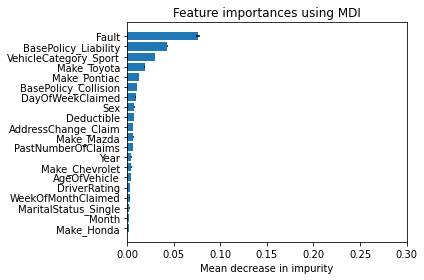

In [31]:
# RF-SMOTH-X4
feature_names = [f"feature {i}" for i in range(X_res.shape[1])]
results = permutation_importance(rf_smoth, X_res, y_res, scoring='roc_auc')
# get importance
importance = results.importances_mean
std = results.importances_std
std = pd.Series(std, index = X_res.columns)
forest_importances = pd.Series(importance, index=X_res.columns)
forest_importances = forest_importances.sort_values(ascending=False)
std = std[forest_importances.index[0:20]]
fig, ax = plt.subplots()
ax.barh(forest_importances.index[0:20], forest_importances[0:20], xerr=std, align='center')
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_title("Feature importances using MDI")
ax.set_xlabel("Mean decrease in impurity")
plt.xlim(0,0.3)
fig.tight_layout()

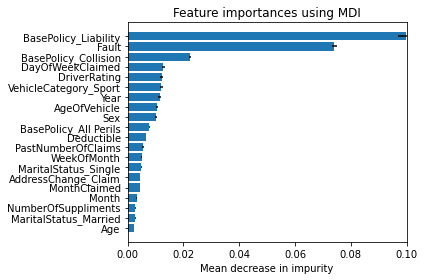

In [32]:
# RF-SMOTH-X5 
feature_names = [f"feature {i}" for i in range(X_res1.shape[1])]
results = permutation_importance(rf_smoth1, X_res1, y_res1, scoring='roc_auc')
# get importance
importance = results.importances_mean
std = results.importances_std
std = pd.Series(std, index = X_res1.columns)
forest_importances = pd.Series(importance, index=X_res1.columns)
forest_importances = forest_importances.sort_values(ascending=False)
std = std[forest_importances.index[0:20]]
fig, ax = plt.subplots()
ax.barh(forest_importances.index[0:20], forest_importances[0:20], xerr=std, align='center')
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_title("Feature importances using MDI")
ax.set_xlabel("Mean decrease in impurity")
plt.xlim(0,0.1)
fig.tight_layout()

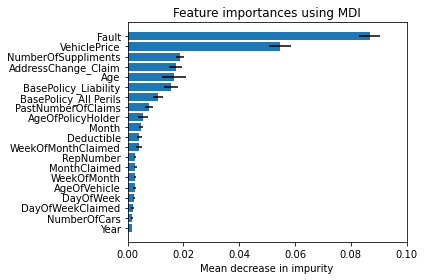

In [33]:
# RF-NearMiss-X4 
feature_names = [f"feature {i}" for i in range(X_under.shape[1])]
results = permutation_importance(rf_nearmiss, X_under, y_under, scoring='roc_auc')
# get importance
importance = results.importances_mean
std = results.importances_std
std = pd.Series(std, index = X_under.columns)
forest_importances = pd.Series(importance, index=X_under.columns)
forest_importances = forest_importances.sort_values(ascending=False)
std = std[forest_importances.index[0:20]]
fig, ax = plt.subplots()
ax.barh(forest_importances.index[0:20], forest_importances[0:20], xerr=std, align='center')
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_title("Feature importances using MDI")
ax.set_xlabel("Mean decrease in impurity")
plt.xlim(0,0.1)
fig.tight_layout()

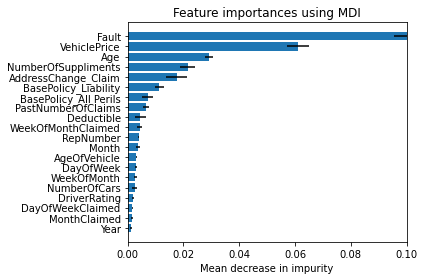

In [34]:
# RF-NearMiss-X5 
feature_names = [f"feature {i}" for i in range(X_under1.shape[1])]
results = permutation_importance(rf_nearmiss1, X_under1, y_under1, scoring='roc_auc')
# get importance
importance = results.importances_mean
std = results.importances_std
std = pd.Series(std, index = X_under1.columns)
forest_importances = pd.Series(importance, index=X_under1.columns)
forest_importances = forest_importances.sort_values(ascending=False)
std = std[forest_importances.index[0:20]]
fig, ax = plt.subplots()
ax.barh(forest_importances.index[0:20], forest_importances[0:20], xerr=std, align='center')
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_title("Feature importances using MDI")
ax.set_xlabel("Mean decrease in impurity")
plt.xlim(0,0.1)
fig.tight_layout()

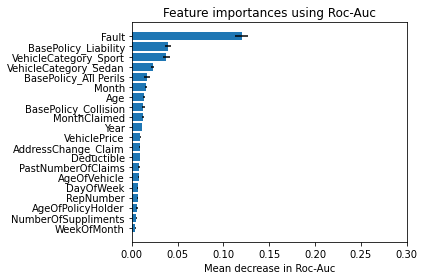

In [35]:
# RF-CS-X4
feature_names = [f"feature {i}" for i in range(X_train.shape[1])]
results = permutation_importance(rf_cs, X_train, y_train, scoring='roc_auc')
# get importance
importance = results.importances_mean
std = results.importances_std
std = pd.Series(std, index = X_train.columns)
forest_importances = pd.Series(importance, index=X_train.columns)
forest_importances = forest_importances.sort_values(ascending=False)
std = std[forest_importances.index[0:20]]
fig, ax = plt.subplots()
ax.barh(forest_importances.index[0:20], forest_importances[0:20], xerr=std, align='center')
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_title("Feature importances using Roc-Auc")
ax.set_xlabel("Mean decrease in Roc-Auc")
plt.xlim(0,0.3)
fig.tight_layout()

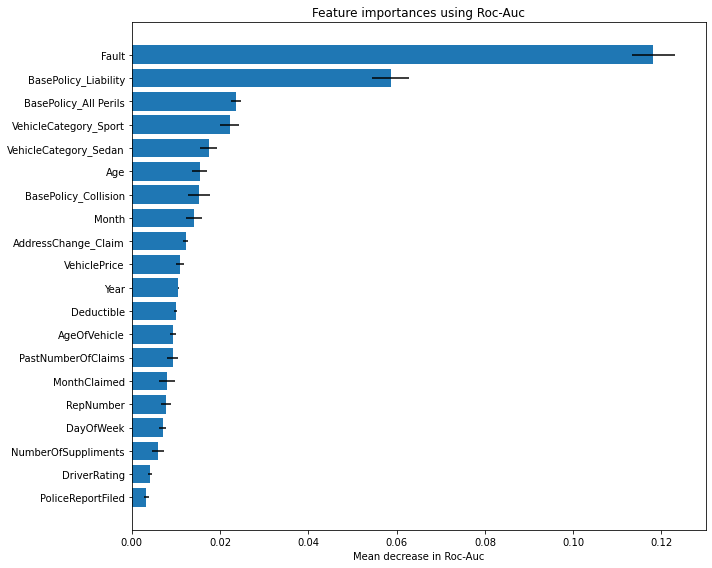

In [36]:
# RF-CS-X5 
feature_names = [f"feature {i}" for i in range(X_train1.shape[1])]
results = permutation_importance(rf_cs1, X_train1, y_train1, scoring='roc_auc')
# get importance
importance = results.importances_mean
std = results.importances_std
std = pd.Series(std, index = X_train1.columns)
forest_importances = pd.Series(importance, index=X_train1.columns)
forest_importances = forest_importances.sort_values(ascending=False)
std = std[forest_importances.index[0:20]]
fig, ax = plt.subplots(figsize=(10,8))
ax.barh(forest_importances.index[0:20], forest_importances[0:20], xerr=std, align='center')
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_title("Feature importances using Roc-Auc")
ax.set_xlabel("Mean decrease in Roc-Auc")
plt.xlim(0,0.13)
fig.tight_layout()

NB- SMOTH

In [37]:
mutual_filter = SelectKBest(mutual_info_classif, k=11)
naiv_b = BernoulliNB(alpha=1)
nb_smoth = make_pipeline(mutual_filter, StandardScaler(), naiv_b)
nb_smoth.fit(X_res, y_res)
nb_smoth_pred = nb_smoth.predict(X_valid)
mutual_filter.feature_names_in_[mutual_filter.get_support(indices=True)]

array(['DayOfWeekClaimed', 'MonthClaimed', 'Age', 'Fault',
       'VehicleCategory_Sport', 'PastNumberOfClaims', 'AgeOfPolicyHolder',
       'NumberOfSuppliments', 'AddressChange_Claim', 'NumberOfCars',
       'BasePolicy_Liability'], dtype=object)

In [38]:
mutual_filter = SelectKBest(mutual_info_classif, k=11)
naiv_b = BernoulliNB(alpha=1)
nb_smoth1 = make_pipeline(mutual_filter, StandardScaler(), naiv_b)
nb_smoth1.fit(X_res1, y_res1)
nb_smoth1_pred = nb_smoth1.predict(X_valid1)
mutual_filter.feature_names_in_[mutual_filter.get_support(indices=True)]

array(['DayOfWeekClaimed', 'MonthClaimed', 'Sex', 'Age', 'Fault',
       'VehicleCategory_Sport', 'PastNumberOfClaims',
       'NumberOfSuppliments', 'AddressChange_Claim', 'NumberOfCars',
       'BasePolicy_Liability'], dtype=object)

NB Smoth Compositon FS

In [39]:
# X_comp_filter 

naiv_b = BernoulliNB(alpha=1)
nb_comp_smoth = make_pipeline( StandardScaler(), naiv_b)
nb_comp_smoth.fit(X_res[comp_names], y_res)
nb_comp_smoth_pred = nb_comp_smoth.predict(X_valid[comp_names])


In [40]:

naiv_b = BernoulliNB(alpha=1)
nb_comp_smoth1 = make_pipeline( StandardScaler(), naiv_b)
nb_comp_smoth1.fit(X_res1[comp_names1], y_res1)
nb_comp_smoth1_pred = nb_comp_smoth1.predict(X_valid1[comp_names1])


NB- NearMiss

In [41]:
mutual_filter = SelectKBest(mutual_info_classif, k=11)
naiv_b = BernoulliNB(alpha=1)
nb_nearmiss = make_pipeline(mutual_filter, StandardScaler(), naiv_b)
nb_nearmiss.fit(X_under, y_under)
nb_nearmiss_pred = nb_nearmiss.predict(X_valid)
mutual_filter.feature_names_in_[mutual_filter.get_support(indices=True)]

array(['WeekOfMonth', 'Age', 'Fault', 'VehiclePrice',
       'PastNumberOfClaims', 'AgeOfVehicle', 'AgeOfPolicyHolder',
       'NumberOfSuppliments', 'AddressChange_Claim',
       'BasePolicy_Liability', 'BasePolicy_All Perils'], dtype=object)

In [42]:
mutual_filter = SelectKBest(mutual_info_classif, k=11)
naiv_b = BernoulliNB(alpha=1)
nb_nearmiss1 = make_pipeline(mutual_filter, StandardScaler(), naiv_b)
nb_nearmiss1.fit(X_under1, y_under1)
nb_nearmiss1_pred = nb_nearmiss1.predict(X_valid1)
mutual_filter.feature_names_in_[mutual_filter.get_support(indices=True)]

array(['Month', 'WeekOfMonthClaimed', 'Age', 'Fault',
       'VehicleCategory_Sport', 'VehiclePrice', 'PastNumberOfClaims',
       'AgeOfVehicle', 'NumberOfSuppliments', 'AddressChange_Claim',
       'BasePolicy_Liability'], dtype=object)

NB NearMiss Compositon FS

In [43]:

naiv_b = BernoulliNB(alpha=1)
nb_comp_nearmiss = make_pipeline( StandardScaler(), naiv_b)
nb_comp_nearmiss.fit(X_under[comp_names], y_under)
nb_comp_nearmiss_pred = nb_comp_nearmiss.predict(X_valid[comp_names])


In [44]:

naiv_b = BernoulliNB(alpha=1 , )
nb_comp_nearmiss1 = make_pipeline( StandardScaler(), naiv_b)
nb_comp_nearmiss1.fit(X_under1[comp_names1], y_under1)
nb_comp_nearmiss1_pred = nb_comp_nearmiss1.predict(X_valid1[comp_names1])


NB- CS

In [45]:
train_weights = sklearn.utils.compute_sample_weight({0: 1, 1: 20}, y_train)
train_weights1 = sklearn.utils.compute_sample_weight({0: 1, 1: 20}, y_train1)

In [46]:
mutual_filter = SelectKBest(mutual_info_classif, k=11)
naiv_b = BernoulliNB(alpha=1 )
nb_cs = make_pipeline(mutual_filter, StandardScaler(),naiv_b)
kwargs = {nb_cs.steps[-1][0] + '__sample_weight': train_weights}
nb_cs.fit(X_train, y_train, **kwargs)
nb_cs_pred = nb_cs.predict(X_valid)
mutual_filter.feature_names_in_[mutual_filter.get_support(indices=True)]


array(['Month', 'Make_Accura', 'Make_Lexus', 'MaritalStatus_Married',
       'Fault', 'VehicleCategory_Sport', 'VehicleCategory_Sedan',
       'Days_Policy_Claim', 'AgeOfPolicyHolder', 'BasePolicy_Liability',
       'BasePolicy_All Perils'], dtype=object)

In [47]:
mutual_filter = SelectKBest(mutual_info_classif, k=11)
naiv_b = BernoulliNB(alpha=1 )
nb_cs1 = make_pipeline(mutual_filter, StandardScaler(),naiv_b)
kwargs1 = {nb_cs1.steps[-1][0] + '__sample_weight': train_weights1}
nb_cs1.fit(X_train1, y_train1, **kwargs1)
nb_cs1_pred = nb_cs1.predict(X_valid1)
mutual_filter.feature_names_in_[mutual_filter.get_support(indices=True)]


array(['DayOfWeekClaimed', 'Fault', 'VehicleCategory_Sport',
       'VehicleCategory_Sedan', 'Deductible', 'DriverRating',
       'Days_Policy_Claim', 'AgeOfVehicle', 'AddressChange_Claim',
       'BasePolicy_Liability', 'BasePolicy_All Perils'], dtype=object)

NB CS with compostion

In [48]:

naiv_b = BernoulliNB(alpha=1 )
nb_comp_cs = make_pipeline(StandardScaler(),naiv_b)
kwargs = {nb_comp_cs.steps[-1][0] + '__sample_weight': train_weights}
nb_comp_cs.fit(X_train[comp_names], y_train, **kwargs)
nb_cs_comp_pred = nb_comp_cs.predict(X_valid[comp_names])




In [49]:

naiv_b = BernoulliNB(alpha=1 )
nb_comp_cs1 = make_pipeline(StandardScaler(),naiv_b)
kwargs1 = {nb_comp_cs1.steps[-1][0] + '__sample_weight': train_weights1}
nb_comp_cs1.fit(X_train[comp_names1], y_train1, **kwargs)
nb_comp_cs1_pred = nb_comp_cs1.predict(X_valid1[comp_names1])




SVM - SMOTH

In [50]:
mutual_filter = SelectKBest(mutual_info_classif, k=12)
svm = SVC(gamma='auto')
svm_smoth = make_pipeline(mutual_filter, StandardScaler(), svm)
svm_smoth.fit(X_res, y_res)
svm_smoth_pred = svm_smoth.predict(X_valid)
mutual_filter.feature_names_in_[mutual_filter.get_support(indices=True)]

array(['DayOfWeekClaimed', 'MonthClaimed', 'Age', 'Fault',
       'VehicleCategory_Sport', 'PastNumberOfClaims', 'AgeOfVehicle',
       'AgeOfPolicyHolder', 'NumberOfSuppliments', 'AddressChange_Claim',
       'NumberOfCars', 'BasePolicy_Liability'], dtype=object)

In [51]:
mutual_filter = SelectKBest(mutual_info_classif, k=12)
svm = SVC(gamma='auto')
svm_smoth1 = make_pipeline(mutual_filter, StandardScaler(), svm)
svm_smoth1.fit(X_res1, y_res1)
svm_smoth1_pred = svm_smoth1.predict(X_valid1)
mutual_filter.feature_names_in_[mutual_filter.get_support(indices=True)]

array(['WeekOfMonth', 'DayOfWeekClaimed', 'MonthClaimed', 'Sex', 'Age',
       'Fault', 'VehicleCategory_Sport', 'PastNumberOfClaims',
       'NumberOfSuppliments', 'AddressChange_Claim', 'NumberOfCars',
       'BasePolicy_Liability'], dtype=object)

SVM - SMOTH COMPOSITION

In [52]:
svm = SVC(gamma='auto')
svm_comp_smoth = make_pipeline(StandardScaler(), svm)
svm_comp_smoth.fit(X_res[comp_names], y_res)
svm_comp_smoth_pred = svm_comp_smoth.predict(X_valid[comp_names])

In [53]:
svm = SVC(gamma='auto')
svm_comp_smoth1 = make_pipeline(StandardScaler(), svm)
svm_comp_smoth1.fit(X_res1[comp_names1], y_res1)
svm_comp_smoth1_pred = svm_comp_smoth1.predict(X_valid1[comp_names1])

#### SVM - NearMiss

In [54]:
mutual_filter = SelectKBest(mutual_info_classif, k=14)
svm = SVC(gamma='auto')
svm_nearmiss = make_pipeline(mutual_filter, StandardScaler(), svm)
svm_nearmiss.fit(X_under, y_under)
svm_nearmiss_pred = svm_nearmiss.predict(X_valid)
mutual_filter.feature_names_in_[mutual_filter.get_support(indices=True)]

array(['Month', 'DayOfWeekClaimed', 'WeekOfMonthClaimed',
       'MaritalStatus_Married', 'Age', 'Fault', 'VehiclePrice',
       'Deductible', 'PastNumberOfClaims', 'AgeOfPolicyHolder',
       'NumberOfSuppliments', 'AddressChange_Claim',
       'BasePolicy_Liability', 'BasePolicy_Collision'], dtype=object)

In [55]:
mutual_filter = SelectKBest(mutual_info_classif, k=14)
svm = SVC(gamma='auto')
svm_nearmiss1 = make_pipeline(mutual_filter, StandardScaler(), svm)
svm_nearmiss1.fit(X_under1, y_under1)
svm_nearmiss1_pred = svm_nearmiss1.predict(X_valid1)
mutual_filter.feature_names_in_[mutual_filter.get_support(indices=True)]

array(['DayOfWeek', 'WeekOfMonthClaimed', 'Sex', 'MaritalStatus_Single',
       'Age', 'Fault', 'VehicleCategory_Utility', 'VehiclePrice',
       'Deductible', 'Days_Policy_Claim', 'AgeOfVehicle',
       'NumberOfSuppliments', 'AddressChange_Claim',
       'BasePolicy_Liability'], dtype=object)

SVM NEARMISS COMPOSITION

In [56]:
svm = SVC(gamma='auto')
svm_comp_nearmiss = make_pipeline( StandardScaler(), svm)
svm_comp_nearmiss.fit(X_under[comp_names], y_under)
svm_comp_nearmiss_pred = svm_comp_nearmiss.predict(X_valid[comp_names])

In [57]:
svm = SVC(gamma='auto')
svm_comp_nearmiss1 = make_pipeline( StandardScaler(), svm)
svm_comp_nearmiss1.fit(X_under1[comp_names1], y_under1)
svm_comp_nearmiss1_pred = svm_comp_nearmiss1.predict(X_valid1[comp_names1])

SVM - CS

In [58]:
mutual_filter = SelectKBest(mutual_info_classif, k=14)
svm = SVC(gamma='auto', class_weight = {0:1 , 1:20})
svm_cs = make_pipeline(mutual_filter, StandardScaler(), svm)
svm_cs.fit(X_train, y_train)
svm_cs_pred = svm_cs.predict(X_valid)
mutual_filter.feature_names_in_[mutual_filter.get_support(indices=True)]

array(['AccidentArea', 'MonthClaimed', 'MaritalStatus_Married', 'Fault',
       'VehicleCategory_Sport', 'VehicleCategory_Sedan', 'VehiclePrice',
       'Deductible', 'Days_Policy_Accident', 'AgeOfPolicyHolder',
       'PoliceReportFiled', 'AgentType', 'BasePolicy_Liability',
       'BasePolicy_All Perils'], dtype=object)

In [59]:
mutual_filter = SelectKBest(mutual_info_classif, k=14)
svm = SVC(gamma='auto', class_weight = {0:1 , 1:20})
svm_cs1 = make_pipeline(mutual_filter, StandardScaler(), svm)
svm_cs1.fit(X_train1, y_train1)
svm_cs1_pred = svm_cs1.predict(X_valid1)
mutual_filter.feature_names_in_[mutual_filter.get_support(indices=True)]


array(['MaritalStatus_Married', 'Fault', 'VehicleCategory_Sport',
       'VehicleCategory_Sedan', 'VehiclePrice', 'Days_Policy_Accident',
       'PoliceReportFiled', 'WitnessPresent', 'AddressChange_Claim',
       'NumberOfCars', 'Year', 'BasePolicy_Liability',
       'BasePolicy_Collision', 'BasePolicy_All Perils'], dtype=object)

SVM - CS COMPOSITION

In [60]:
svm = SVC(gamma='auto',  class_weight = {0:1 , 1:20})
svm_comp_cs = make_pipeline(StandardScaler(), svm)
svm_comp_cs.fit(X_res[comp_names], y_res)
svm_comp_cs_pred = svm_comp_cs.predict(X_valid[comp_names])

In [61]:
svm = SVC(gamma='auto',  class_weight = {0:1 , 1:20})
svm_comp_cs1 = make_pipeline(StandardScaler(), svm)
svm_comp_cs1.fit(X_res1[comp_names1], y_res1)
svm_comp_cs1_pred = svm_comp_cs1.predict(X_valid1[comp_names1])

# **Part 5 -  Evaluating preformance, model selection**

In [62]:
## define function for evaluating by few metrics and CM
def eval_pref(pred, y, classifier, model):
    precision, recall, thresholds = precision_recall_curve(y, pred)
    auc1 = auc(recall, precision)
    print(model,':')
    print('Accuarcy: ', accuracy_score(y,pred))
    print('Roc_Auc: ', roc_auc_score(y,pred))
    print('G-mean: ', geometric_mean_score(y,pred))
    print('F1-score: ', f1_score(y,pred))
    print('F2-score: ', fbeta_score(y, pred, beta=2))
    print('AUC-PR: ', auc1)
    cm = confusion_matrix(y, pred, labels=classifier.classes_)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=['Not Fraud', 'Fraud'])
    disp.plot()

RF :
Accuarcy:  0.9410048622366288
Roc_Auc:  0.5
G-mean:  0.0
F1-score:  0.0
F2-score:  0.0
AUC-PR:  0.5294975688816855


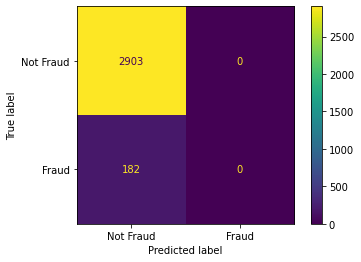

In [63]:
eval_pref(rf_pred, y_valid, rf, 'RF')

RF-SMOTH :
Accuarcy:  0.7254457050243112
Roc_Auc:  0.6764402493820337
G-mean:  0.6741545609009189
F1-score:  0.21062441752096928
F2-score:  0.3489808523780112
AUC-PR:  0.3850346014311438


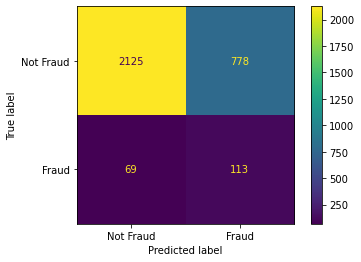

In [64]:
eval_pref(rf_smoth_pred, y_valid, rf_smoth, 'RF-SMOTH')

RF-SMOTH1 :
Accuarcy:  0.7225283630470016
Roc_Auc:  0.7083653514931503
G-mean:  0.7081833256844573
F1-score:  0.22743682310469313
F2-score:  0.38089480048367597
AUC-PR:  0.423264578429786


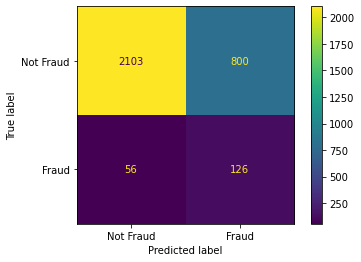

In [65]:
eval_pref(rf_smoth1_pred, y_valid1, rf_smoth1, 'RF-SMOTH1')

RF-NearMiss :
Accuarcy:  0.4962722852512156
Roc_Auc:  0.657670352382719
G-mean:  0.6317003423876768
F1-score:  0.16451612903225807
F2-score:  0.31795511221945133
AUC-PR:  0.4706198204852735


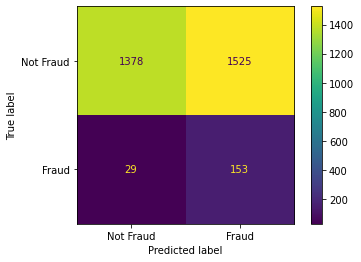

In [66]:
eval_pref(rf_nearmiss_pred, y_valid, rf_nearmiss, 'RF-NearMiss')

RF-NearMiss1 :
Accuarcy:  0.5072933549432739
Roc_Auc:  0.6635263634057985
G-mean:  0.6394459658984643
F1-score:  0.16757940854326395
F2-score:  0.3225126475548061
AUC-PR:  0.4715626791195531


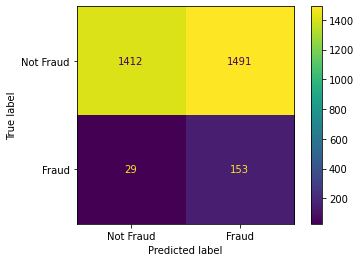

In [67]:
eval_pref(rf_nearmiss1_pred, y_valid1, rf_nearmiss1, 'RF-NearMiss1')

RF-CS :
Accuarcy:  0.5883306320907618
Roc_Auc:  0.7529355763079497
G-mean:  0.7294402939831154
F1-score:  0.2121588089330025
F2-score:  0.39620018535681184
AUC-PR:  0.5313532496676743


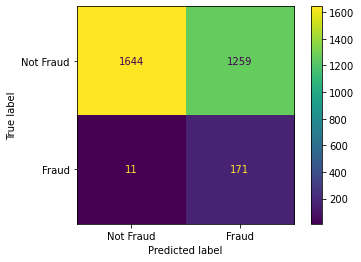

In [68]:
eval_pref(rf_cs_pred, y_valid, rf_cs, 'RF-CS')

RF-CS :
Accuarcy:  0.5889789303079417
Roc_Auc:  0.7532800475446013
G-mean:  0.7298838575960032
F1-score:  0.2124223602484472
F2-score:  0.39656771799628937
AUC-PR:  0.5314369894572964


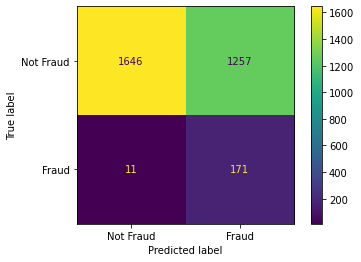

In [69]:
eval_pref(rf_cs1_pred, y_valid1, rf_cs1, 'RF-CS')

SVM-SMOTH1 :
Accuarcy:  0.7280388978930308
Roc_Auc:  0.7267434597782514
G-mean:  0.726741975634696
F1-score:  0.23934723481414324
F2-score:  0.4002425712553063
AUC-PR:  0.4424023281371277


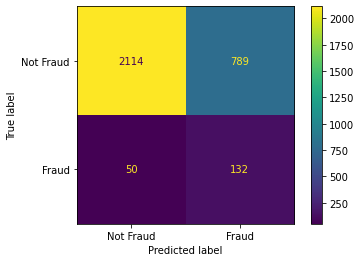

In [70]:
eval_pref(svm_smoth1_pred, y_valid1, svm_smoth1, 'SVM-SMOTH1')

SVM-COMP-SMOTH :
Accuarcy:  0.7270664505672609
Roc_Auc:  0.5562756224140999
G-mean:  0.5214851795044908
F1-score:  0.135523613963039
F2-score:  0.21710526315789475
AUC-PR:  0.24178599628356512


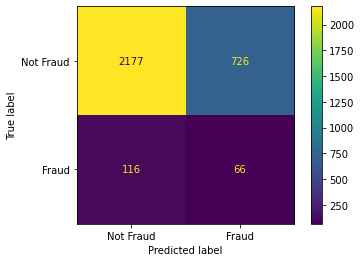

In [71]:
eval_pref(svm_comp_smoth_pred, y_valid, svm_comp_smoth, 'SVM-COMP-SMOTH')


SVM-COMP-SMOTH1 :
Accuarcy:  0.8314424635332253
Roc_Auc:  0.5705352174521998
G-mean:  0.48785952090445284
F1-score:  0.16129032258064518
F2-score:  0.21440823327615777
AUC-PR:  0.21583410410035042


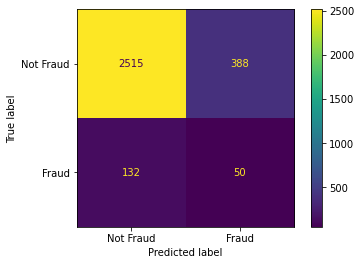

In [72]:
eval_pref(svm_comp_smoth1_pred, y_valid1, svm_comp_smoth1, 'SVM-COMP-SMOTH1')


SVM-NearMiss :
Accuarcy:  0.453484602917342
Roc_Auc:  0.6426603021504848
G-mean:  0.605813087976891
F1-score:  0.15615615615615616
F2-score:  0.30660377358490565
AUC-PR:  0.4757369088333181


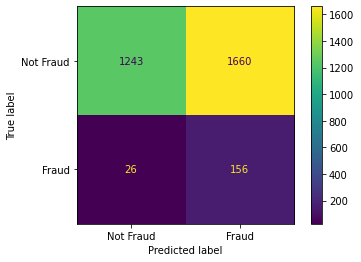

In [73]:
eval_pref(svm_nearmiss_pred, y_valid, svm_nearmiss, 'SVM-NearMiss')

SVM-NearMiss1 :
Accuarcy:  0.5102106969205835
Roc_Auc:  0.6161511585211207
G-mean:  0.604330388789893
F1-score:  0.15064643057897695
F2-score:  0.28817204301075267
AUC-PR:  0.41786510985637393


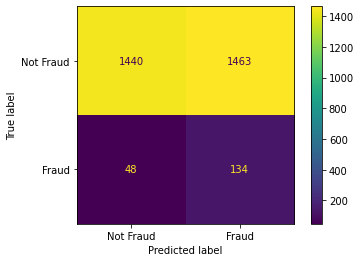

In [74]:
eval_pref(svm_nearmiss1_pred, y_valid1, svm_nearmiss1, 'SVM-NearMiss1')

SVM-COMP-NearMiss :
Accuarcy:  0.4651539708265802
Roc_Auc:  0.5767603048002635
G-mean:  0.5627086182464625
F1-score:  0.13431269674711438
F2-score:  0.2610114192495921
AUC-PR:  0.3975233474178674


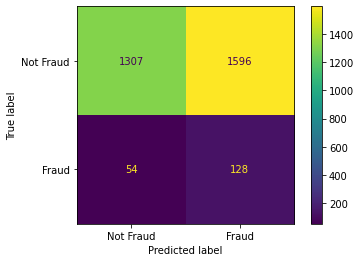

In [75]:
eval_pref(svm_comp_nearmiss_pred, y_valid1, svm_comp_nearmiss, 'SVM-COMP-NearMiss')

SVM-COMP-NearMiss1 :
Accuarcy:  0.5705024311183144
Roc_Auc:  0.5503363326305111
G-mean:  0.5498611874163317
F1-score:  0.12656558998022416
F2-score:  0.23267086766844405
AUC-PR:  0.3136297315854069


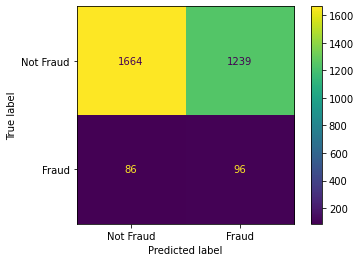

In [76]:
eval_pref(svm_comp_nearmiss1_pred, y_valid1, svm_comp_nearmiss1, 'SVM-COMP-NearMiss1')

SVM-CS :
Accuarcy:  0.6016207455429498
Roc_Auc:  0.7368220824989683
G-mean:  0.7207007904088587
F1-score:  0.2086284610431423
F2-score:  0.38589804668889954
AUC-PR:  0.5073773989417198


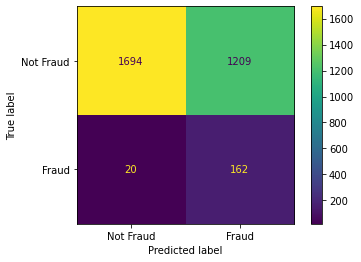

In [77]:
eval_pref(svm_cs_pred, y_valid, svm_cs, 'SVM-CS')

SVM-CS1 :
Accuarcy:  0.593517017828201
Roc_Auc:  0.7453912776854561
G-mean:  0.7252298726545547
F1-score:  0.21032745591939545
F2-score:  0.3912839737582005
AUC-PR:  0.5206106628097585


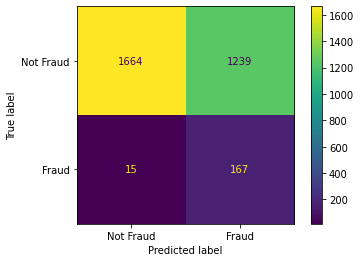

In [78]:
eval_pref(svm_cs1_pred, y_valid1, svm_cs1, 'SVM-CS1')

SVM-Comp-CS1 :
Accuarcy:  0.38055105348460294
Roc_Auc:  0.6322324764453596
G-mean:  0.5641748978511095
F1-score:  0.1487750556792873
F2-score:  0.2991759226083841
AUC-PR:  0.5016973634604565


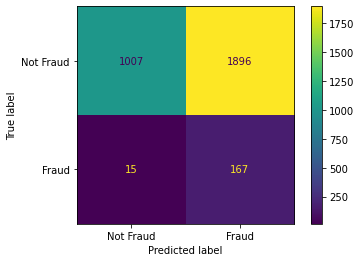

In [79]:
eval_pref(svm_comp_cs1_pred, y_valid1, svm_comp_cs1, 'SVM-Comp-CS1')

SVM-Comp-CS :
Accuarcy:  0.37828200972447323
Roc_Auc:  0.6336018442460054
G-mean:  0.563609329028338
F1-score:  0.14906832298136646
F2-score:  0.3
AUC-PR:  0.5043480458391317


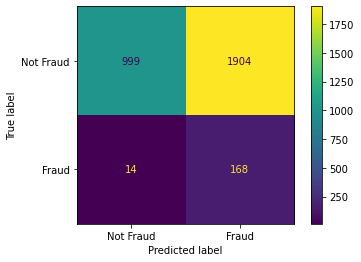

In [80]:
eval_pref(svm_comp_cs_pred, y_valid, svm_comp_cs, 'SVM-Comp-CS')

NB-SMOTH :
Accuarcy:  0.6061588330632091
Roc_Auc:  0.7031831413505544
G-mean:  0.6945255376601889
F1-score:  0.1958967571144937
F2-score:  0.3597472046669907
AUC-PR:  0.4677849045696088


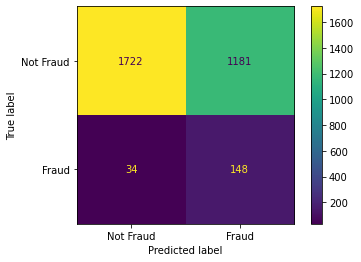

In [81]:
eval_pref(nb_smoth_pred, y_valid, nb_smoth, 'NB-SMOTH')

NB-SMOTH1 :
Accuarcy:  0.6356564019448947
Roc_Auc:  0.705981496973574
G-mean:  0.7014645796251424
F1-score:  0.2028368794326241
F2-score:  0.36554192229038845
AUC-PR:  0.4574028061749726


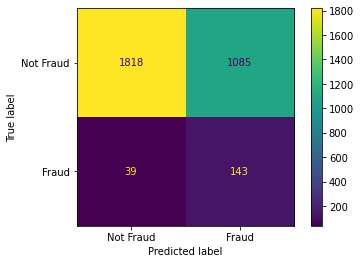

In [82]:
eval_pref(nb_smoth1_pred, y_valid1, nb_smoth1, 'NB-SMOTH1')

NB-COMP-SMOTH1 :
Accuarcy:  0.4022690437601297
Roc_Auc:  0.6025719888103629
G-mean:  0.5581391809195324
F1-score:  0.14072693383038212
F2-score:  0.2804606240713225
AUC-PR:  0.45830143121179184


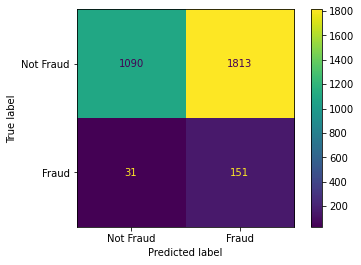

In [83]:
eval_pref(nb_comp_smoth1_pred, y_valid1, nb_comp_smoth1, 'NB-COMP-SMOTH1')

NB-COMP-SMOTH :
Accuarcy:  0.4168557536466775
Roc_Auc:  0.6025975402482464
G-mean:  0.5646024739907209
F1-score:  0.1412887828162291
F2-score:  0.28019689511548657
AUC-PR:  0.4507866387734661


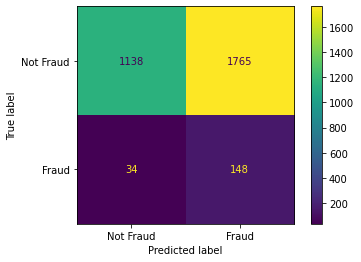

In [84]:
eval_pref(nb_comp_smoth_pred, y_valid, nb_comp_smoth, 'NB-COMP-SMOTH')

NB-COMP-SMOTH1 :
Accuarcy:  0.4022690437601297
Roc_Auc:  0.6025719888103629
G-mean:  0.5581391809195324
F1-score:  0.14072693383038212
F2-score:  0.2804606240713225
AUC-PR:  0.45830143121179184


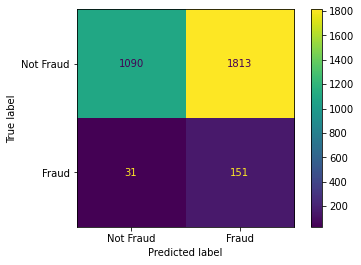

In [85]:
eval_pref(nb_comp_smoth1_pred, y_valid, nb_comp_smoth1, 'NB-COMP-SMOTH1')

NB--nearmiss :
Accuarcy:  0.5153970826580226
Roc_Auc:  0.6266319798011152
G-mean:  0.6138098859086472
F1-score:  0.15488976823063877
F2-score:  0.2958963282937365
AUC-PR:  0.42683018232509184


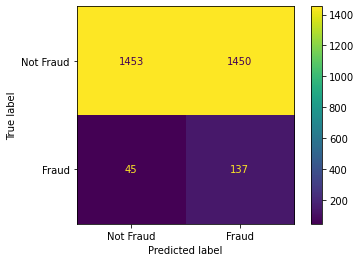

In [86]:
eval_pref(nb_nearmiss_pred, y_valid, nb_nearmiss, 'NB--nearmiss')

NB--nearmiss1 :
Accuarcy:  0.5630470016207455
Roc_Auc:  0.6545256328239449
G-mean:  0.6462559627205786
F1-score:  0.16995073891625617
F2-score:  0.31797235023041476
AUC-PR:  0.4341023675542408


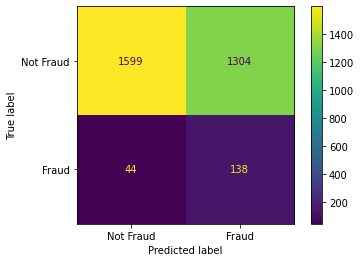

In [87]:
eval_pref(nb_nearmiss1_pred, y_valid1, nb_nearmiss1, 'NB--nearmiss1')

NB-COMP-nearmiss :
Accuarcy:  0.5358184764991897
Roc_Auc:  0.6117326524663762
G-mean:  0.6056474811796324
F1-score:  0.1506524317912218
F2-score:  0.2844982078853047
AUC-PR:  0.4000359440681736


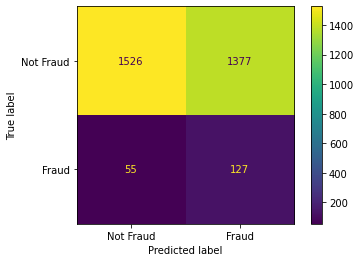

In [88]:
eval_pref(nb_comp_nearmiss_pred, y_valid, nb_comp_nearmiss, 'NB-COMP-nearmiss')

NB-COMP-nearmiss1 :
Accuarcy:  0.5212317666126418
Roc_Auc:  0.606557066770639
G-mean:  0.5987928840377166
F1-score:  0.1477207155222158
F2-score:  0.2808249232119351
AUC-PR:  0.40166407841844926


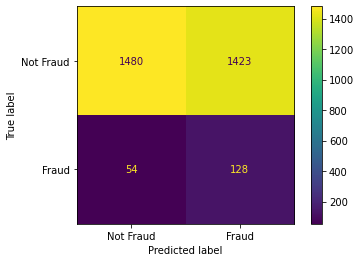

In [89]:
eval_pref(nb_comp_nearmiss1_pred, y_valid, nb_comp_nearmiss1, 'NB-COMP-nearmiss1')

NB-CS :
Accuarcy:  0.5562398703403566
Roc_Auc:  0.7024090274176392
G-mean:  0.6825792128855084
F1-score:  0.18753709198813057
F2-score:  0.3541012998655312
AUC-PR:  0.4905172669485212


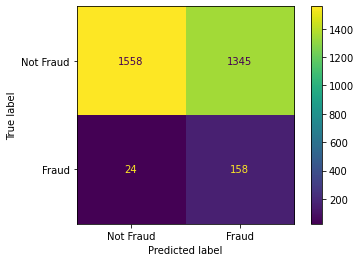

In [90]:
eval_pref(nb_cs_pred, y_valid, nb_cs, 'NB-CS')

NB-CS :
Accuarcy:  0.5562398703403566
Roc_Auc:  0.7024090274176392
G-mean:  0.6825792128855084
F1-score:  0.18753709198813057
F2-score:  0.3541012998655312
AUC-PR:  0.4905172669485212


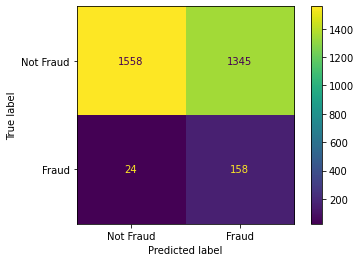

In [91]:
eval_pref(nb_cs_pred, y_valid, nb_cs, 'NB-CS')

NB-CS1 :
Accuarcy:  0.5607779578606159
Roc_Auc:  0.7176954117188357
G-mean:  0.695294971544507
F1-score:  0.19393218322427128
F2-score:  0.36596317916479576
AUC-PR:  0.5052511940536155


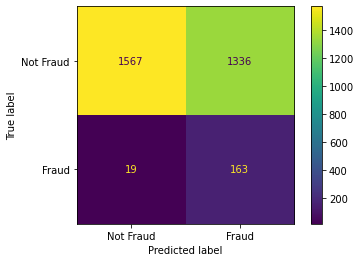

In [92]:
eval_pref(nb_cs1_pred, y_valid, nb_cs1, 'NB-CS1')

NB-Comp CS :
Accuarcy:  0.3841166936790924
Roc_Auc:  0.6238269997312367
G-mean:  0.5615132880761423
F1-score:  0.14645103324348607
F2-score:  0.294011544011544
AUC-PR:  0.4907544127682446


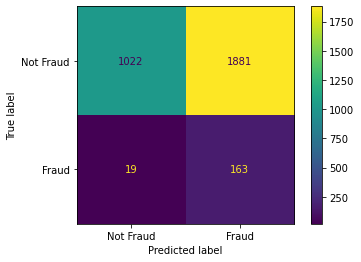

In [93]:
eval_pref(nb_cs_comp_pred,y_valid , nb_comp_cs, 'NB-Comp CS')

NB-Comp CS :
Accuarcy:  0.38217179902755266
Roc_Auc:  0.6227935860212815
G-mean:  0.5598625840006217
F1-score:  0.14605734767025091
F2-score:  0.2933765298776098
AUC-PR:  0.490637711894778


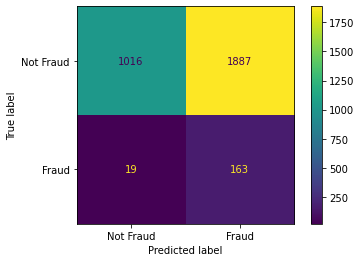

In [94]:
eval_pref(nb_comp_cs1_pred,y_valid1 , nb_comp_cs1, 'NB-Comp CS')

comparison by bar plots

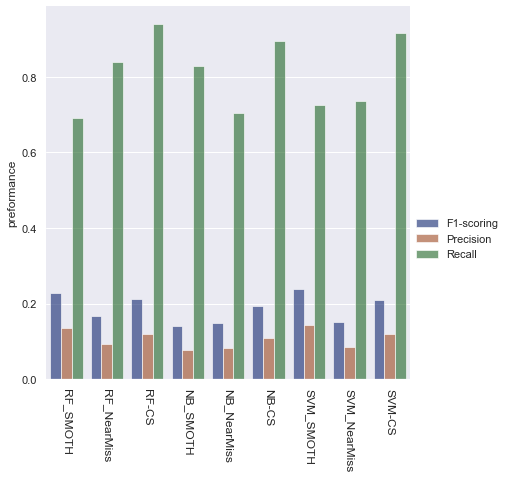

In [96]:
# presicion, recall, F1-score - without decompasition feature selection
dict_pre = {'Model': ['RF_SMOTH','RF_NearMiss','RF-CS','NB_SMOTH','NB_NearMiss','NB-CS','SVM_SMOTH','SVM_NearMiss','SVM-CS'], 'metric': np.repeat('Precision',9) ,'scoring': [] }
dict_rec = {'Model': ['RF_SMOTH','RF_NearMiss','RF-CS','NB_SMOTH','NB_NearMiss','NB-CS','SVM_SMOTH','SVM_NearMiss','SVM-CS'], 'metric': np.repeat('Recall',9), 'scoring': [] }
dict_f1 = {'Model': ['RF_SMOTH','RF_NearMiss','RF-CS','NB_SMOTH','NB_NearMiss','NB-CS','SVM_SMOTH','SVM_NearMiss','SVM-CS'], 'metric': np.repeat('F1-scoring',9), 'scoring': []  }
classifers_list = [rf_smoth1,rf_nearmiss1,rf_cs1, nb_comp_smoth1,nb_comp_nearmiss1,nb_comp_cs1,svm_smoth1,svm_nearmiss1,svm_cs1]
pred_list = [rf_smoth1_pred,rf_nearmiss1_pred,rf_cs1_pred, nb_comp_smoth1_pred,nb_comp_nearmiss1_pred,nb_cs1_pred,svm_smoth1_pred,svm_nearmiss1_pred,svm_cs1_pred]
dict_f1['scoring'] =  [f1_score(y_valid1,pred) for pred in pred_list]
dict_pre['scoring'] = [precision_score(y_valid1,pred) for pred in pred_list]
dict_rec['scoring'] = [recall_score(y_valid1, pred) for pred in pred_list]

models_results = pd.concat([pd.DataFrame.from_dict(dict_f1),pd.DataFrame.from_dict(dict_pre),pd.DataFrame.from_dict(dict_rec)])

sns.set_theme()


# Draw a nested barplot by models and scoring
g = sns.catplot(
    data=models_results, kind="bar",
    x="Model", y="scoring", hue="metric",
    ci="sd", palette="dark", alpha=.6, height=6
)
g.despine(left=True)
g.set_axis_labels("", "preformance")
g.legend.set_title("")
g.set_xticklabels(rotation = -90, size = 12)



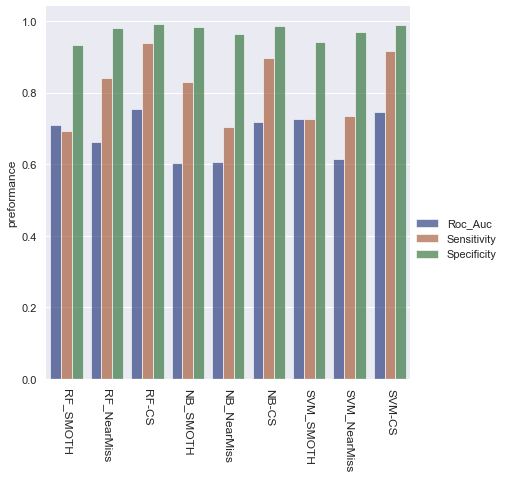

In [97]:
# senstivity, specificity, Roc Auc
dict_roc = {'Model': ['RF_SMOTH','RF_NearMiss','RF-CS','NB_SMOTH','NB_NearMiss','NB-CS','SVM_SMOTH','SVM_NearMiss','SVM-CS'], 'metric': np.repeat('Roc_Auc',9) ,'scoring': [] }
dict_sens = {'Model': ['RF_SMOTH','RF_NearMiss','RF-CS','NB_SMOTH','NB_NearMiss','NB-CS','SVM_SMOTH','SVM_NearMiss','SVM-CS'], 'metric': np.repeat('Sensitivity',9), 'scoring': [] }
dict_spec = {'Model': ['RF_SMOTH','RF_NearMiss','RF-CS','NB_SMOTH','NB_NearMiss','NB-CS','SVM_SMOTH','SVM_NearMiss','SVM-CS'], 'metric': np.repeat('Specificity',9), 'scoring': []  }
pred_list = [rf_smoth1_pred,rf_nearmiss1_pred,rf_cs1_pred, nb_comp_smoth1_pred,nb_comp_nearmiss1_pred,nb_cs1_pred,svm_smoth1_pred,svm_nearmiss1_pred,svm_cs1_pred]


dict_roc['scoring'] =  [roc_auc_score(y_valid1,pred) for pred in pred_list]
dict_spec['scoring'] = [confusion_matrix(y_valid1, pred).ravel()[1]/(confusion_matrix(y_valid1, pred).ravel()[1]+confusion_matrix(y_valid1, pred).ravel()[2]) for pred in pred_list]
dict_sens['scoring'] = [recall_score(y_valid1, pred) for pred in pred_list]

models_results = pd.concat([pd.DataFrame.from_dict(dict_roc),pd.DataFrame.from_dict(dict_sens),pd.DataFrame.from_dict(dict_spec)])

sns.set_theme()


# Draw a nested barplot by models and scoring
g = sns.catplot(
    data=models_results, kind="bar",
    x="Model", y="scoring", hue="metric",
    ci="sd", palette="dark", alpha=.6, height=6
)
g.despine(left=True)
g.set_axis_labels("", "preformance")
g.legend.set_title("")
g.set_xticklabels(rotation = -90, size = 12)



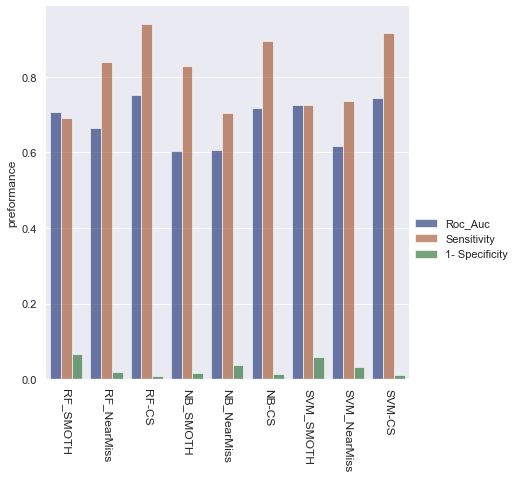

In [98]:
# Sensitivity, 1- Specificity, Recall
dict_roc = {'Model': ['RF_SMOTH','RF_NearMiss','RF-CS','NB_SMOTH','NB_NearMiss','NB-CS','SVM_SMOTH','SVM_NearMiss','SVM-CS'], 'metric': np.repeat('Roc_Auc',9) ,'scoring': [] }
dict_sens = {'Model': ['RF_SMOTH','RF_NearMiss','RF-CS','NB_SMOTH','NB_NearMiss','NB-CS','SVM_SMOTH','SVM_NearMiss','SVM-CS'], 'metric': np.repeat('Sensitivity',9), 'scoring': [] }
dict_1spec = {'Model': ['RF_SMOTH','RF_NearMiss','RF-CS','NB_SMOTH','NB_NearMiss','NB-CS','SVM_SMOTH','SVM_NearMiss','SVM-CS'], 'metric': np.repeat('1- Specificity',9), 'scoring': []  }
pred_list = [rf_smoth1_pred,rf_nearmiss1_pred,rf_cs1_pred, nb_comp_smoth1_pred,nb_comp_nearmiss1_pred,nb_cs1_pred,svm_smoth1_pred,svm_nearmiss1_pred,svm_cs1_pred]


dict_roc['scoring'] =  [roc_auc_score(y_valid1,pred) for pred in pred_list]
dict_1spec['scoring'] = [1-(confusion_matrix(y_valid1, pred).ravel()[1]/(confusion_matrix(y_valid1, pred).ravel()[1]+confusion_matrix(y_valid1, pred).ravel()[2])) for pred in pred_list]
dict_sens['scoring'] = [recall_score(y_valid1, pred) for pred in pred_list]

models_results = pd.concat([pd.DataFrame.from_dict(dict_roc),pd.DataFrame.from_dict(dict_sens),pd.DataFrame.from_dict(dict_1spec)])

sns.set_theme()


# Draw a nested barplot by models and scoring
g = sns.catplot(
    data=models_results, kind="bar",
    x="Model", y="scoring", hue="metric",
    ci="sd", palette="dark", alpha=.6, height=6
)
g.despine(left=True)
g.set_axis_labels("", "preformance")
g.legend.set_title("")
g.set_xticklabels(rotation = -90, size = 12)

we can see RF-CS has the best preformance

# **part 5 - Test preformance of the chosen model**

chosen model :
Accuarcy:  0.6251621271076524
Roc_Auc:  0.7956771002946055
G-mean:  0.7718316237412358
F1-score:  0.23746701846965695
F2-score:  0.4364694471387003
AUC-PR:  0.5622960155873661


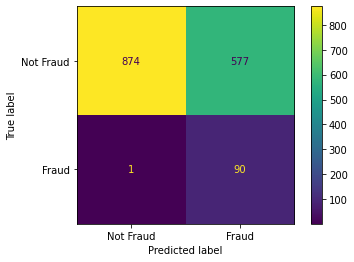

In [95]:
rf_cs1_pred_test = rf_cs1.predict(X_test1)
eval_pref(rf_cs1_pred_test,y_test1 , rf_cs1, 'chosen model') 